Libraries to be used:

In [1]:
#import sys
#!{sys.executable} -m pip install tabulate 

In [1]:
import pandas as pd
import numpy as np

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import MinMaxScaler for min-max normalization
from sklearn.preprocessing import MinMaxScaler

import folium # map rendering library
from folium.plugins import HeatMap # for HeatMap function
import seaborn as sns # 

from PIL import Image # for importing image
from matplotlib.pyplot import imshow # for ploting image on the jupyter environment

from tabulate import tabulate # formatting tables (including for Latex)

print('Libraries imported.')

Libraries imported.


### Exploring Rio de Janeiro's Neighborhoods

First, it was required to obtain the geocoordinates of the neighborhoods of Rio de Janeiro. 

As this file was not available, a solution found was to download google earth and manually extract the latitude and longitude for each neighborhood. As the number of neighboorhoods in Rio is huge, as it is a city of almost 7 million inhabitants (and more than 11 million in its metropolitan area), I have restricted the scope to only the most well-known and touristic boroughs of the city, which are Zona Sul, the Centro (Downtown) and the Grande Tijuca (which is a small part of a larger administrative region: the Região Norte or North Region).

Another observation is that some neighborhoods are huge in area, and, because of that, some of them are broken in many parts, as it is the case of Tijuca, with more than 160 thousand inhabitants.

**1) Importing an excel file with the geocoordinates of some of Rio de Janeiro's neighborhoods.**

In [8]:
rio = pd.read_excel('Rio_Neighborhoods.xlsx', sheet_name = 'Oficial_Final')

In [10]:
print("This file has {} observations/neighborhoods and {} columns.".format(rio.shape[0],rio.shape[1]))
rio.head()

This file has 139 observations/neighborhoods and 4 columns.


,Neighborhoods,Borough,Latitude,Longitude
0,Leme 1,Zona Sul,-22.962373,-43.168171
1,Leme 2,Zona Sul,-22.963840,-43.173703
2,Copacabana 1,Zona Sul,-22.967252,-43.181659
3,Copacabana 2,Zona Sul,-22.969604,-43.185210
4,Copacabana 3,Zona Sul,-22.974992,-43.189025


In [11]:
print("Type of Latitude is {} and the dtypes of Latitude and Longitude are {} and {}.".format(type(rio.Latitude).__name__,rio.Latitude.dtype,rio.Longitude.dtype)) 

Type of Latitude is Series and the dtypes of Latitude and Longitude are float64 and float64.


**Define Foursquare Credentials and Version**

In [1]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = ''

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


Use geopy library to get the latitude and longitude values of **Rio**.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent toronto_explorer, as shown below.

In [13]:
address = 'Rio de Janeiro, RJ'

geolocator = Nominatim(user_agent="rio_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Rio de Janeiro, RJ are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Rio de Janeiro, RJ are -22.9110137, -43.2093727.


**2) Creating a follium map of Rio de Janeiro.**

In [14]:
# create map of Rio using latitude and longitude values
map_rio = folium.Map(location=[latitude, longitude], zoom_start=12.00)

# add markers to map
for lat, lng, borough, neighborhood in zip(rio['Latitude'], rio['Longitude'], rio['Borough'], rio['Neighborhoods']): #zip for multiple objects iterations'
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng], # iterates over latitude and longitude
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_rio) # same as append, but to follium maps.
    
map_rio

**2) Creating a follium map of Rio de Janeiro based on its Boroughs**

In [33]:
rio_zs = rio[rio['Borough'] == 'Zona Sul']
rio_tjk = rio[rio['Borough'] == 'Grande Tijuca']
rio_dt = rio[rio['Borough'] == 'Centro']

In [35]:
# create map of Rio using latitude and longitude values
map_rio = folium.Map(location=[latitude, longitude], zoom_start=12.00)

# add markers to map (Borough = Zona Sul)
for lat, lng, borough, neighborhood in zip(rio_zs['Latitude'], rio_zs['Longitude'], rio_zs['Borough'], rio_zs['Neighborhoods']): #zip for multiple objects iterations'
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng], # iterates over latitude and longitude
        radius=4,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_rio) # same as append, but to follium maps.

# add markers to map (Borough = Grande Tijuca)
for lat, lng, borough, neighborhood in zip(rio_tjk['Latitude'], rio_tjk['Longitude'], rio_tjk['Borough'], rio_tjk['Neighborhoods']): #zip for multiple objects iterations'
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng], # iterates over latitude and longitude
        radius=4,
        popup=label,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=0.7,
        parse_html=False).add_to(map_rio) # same as append, but to follium maps.
    
# add markers to map (Borough = Centro)
for lat, lng, borough, neighborhood in zip(rio_dt['Latitude'], rio_dt['Longitude'], rio_dt['Borough'], rio_dt['Neighborhoods']): #zip for multiple objects iterations'
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng], # iterates over latitude and longitude
        radius=4,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_rio) # same as append, but to follium maps.
    
map_rio

**Obtaining the number of observations per Borough**

In [15]:
rio_boroughs = rio[['Neighborhoods','Borough']].groupby('Borough').count().reset_index()
print(rio_boroughs.to_latex())
rio_boroughs

\begin{tabular}{llr}
\toprule
{} &        Borough &  Neighborhoods \\
\midrule
0 &         Centro &             39 \\
1 &  Grande Tijuca &             42 \\
2 &       Zona Sul &             58 \\
\bottomrule
\end{tabular}



,Borough,Neighborhoods
0,Centro,39
1,Grande Tijuca,42
2,Zona Sul,58


## 2. Explore Neighborhoods in Rio
### Let's create a function to repeat the same process to all the neighborhoods that have Toronto in their names

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=350, LIMIT = 500):
    
    venues_list=[] # initiates venues_list
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['icon']['prefix'].split("/")[5],
            v['venue']['categories'][0]['name']) for v in results])
        
      

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Main Venue Category',           
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
# type your answer here

rio_venues = getNearbyVenues(names=rio['Neighborhoods'],
                                   latitudes=rio['Latitude'],
                                   longitudes=rio['Longitude']
                                  )

#the function getNearbyVenues print the names of the neighborhoods.

Leme 1
Leme 2
Copacabana 1
Copacabana 2
Copacabana 3
Copacabana 4
Copacabana 5
Copacabana 6
Copacabana 7
Copacabana 8
Copacabana - Bairro Peixoto
Arpoador
Ipanema 1
Ipanema 2
Ipanema 3
Ipanema 4
Leblon 1
Leblon 2
Leblon 3
Leblon 4
Leblon 5
Gávea 1
Gávea 2
Jardim Botânico 1
Jardim Botânico 2
Jardim Botânico 3
Jardim Botânico 4
Lagoa - Fonte da Saudade
Humaitá 1
Humaitá 2
Botafogo 1
Botafogo 2
Botafogo 3
Botafogo 4
Botafogo 5
Botafogo 6
Botafogo 7
Botafogo 8
Botafogo 9
Urca 1
Urca 2
Laranjeiras 1
Laranjeiras 2
Flamengo 
Catete 1
Catete 2
Largo do Machado
Cosme Velho
Glória
Glória - Beco do Rato
Glória - Santa Teresa
Santa Teresa - Largo dos Guimarães
Praça Passeio Público
Cinelândia
Castelo
Av. Franklin Roosevelt
Museu Histórico Nacional
Carioca
Rua do Lavradio
Praça Tiradentes
Rua do Ouvidor
Camelôdromo
Saara
Candelária
Praça XV
Praça Mauá
Lapa 1
Lapa 2
Bairro de Fátima
Cruz Vermelha
Rua do Senado
Rua General Caldwell
Catumbi I
Rua Acre
Valongo
Av. Marechal Floriano
Central do Brasil
Mo

In [18]:
print(rio_venues.shape)
rio_venues.head()
#rio_venues[rio_venues.Neighborhood == "Rua General Caldwell"].head(200)

(4737, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Main Venue Category,Venue Category
0,Leme 1,-22.962373,-43.168171,Bar do David,-22.960691,-43.168878,nightlife,Bar
1,Leme 1,-22.962373,-43.168171,Ponta do Leme,-22.962557,-43.166152,parks_outdoors,Beach
2,Leme 1,-22.962373,-43.168171,Calçadão do Leme,-22.962679,-43.167250,parks_outdoors,Pedestrian Plaza
3,Leme 1,-22.962373,-43.168171,Gaia Art & Café,-22.962270,-43.168331,food,Café
4,Leme 1,-22.962373,-43.168171,Marius Degustare,-22.962361,-43.166333,food,Seafood Restaurant


In [19]:
print(rio_venues.rename(columns = {'Neighborhood Latitude' : 'Latitude', 'Neighborhood Longitude' : 'Longitude'}).head().to_latex(encoding='utf-8', escape=False))

\begin{tabular}{llrrlrrll}
\toprule
{} & Neighborhood &   Latitude &  Longitude &             Venue &  Venue Latitude &  Venue Longitude & Main Venue Category &      Venue Category \\
\midrule
0 &       Leme 1 & -22.962373 & -43.168171 &      Bar do David &      -22.960691 &       -43.168878 &           nightlife &                 Bar \\
1 &       Leme 1 & -22.962373 & -43.168171 &     Ponta do Leme &      -22.962557 &       -43.166152 &      parks_outdoors &               Beach \\
2 &       Leme 1 & -22.962373 & -43.168171 &  Calçadão do Leme &      -22.962679 &       -43.167250 &      parks_outdoors &    Pedestrian Plaza \\
3 &       Leme 1 & -22.962373 & -43.168171 &   Gaia Art & Café &      -22.962270 &       -43.168331 &                food &                Café \\
4 &       Leme 1 & -22.962373 & -43.168171 &  Marius Degustare &      -22.962361 &       -43.166333 &                food &  Seafood Restaurant \\
\bottomrule
\end{tabular}



Saving the results in a excel .xlsx file.

In [20]:
rio_venues.to_excel('rio_venues.xlsx',index = None, header=True)

**Let's check how many venues were returned for each neighborhood**

In [31]:
rio_counts = rio_venues.groupby(['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']).count().reset_index().iloc[:,0:4].rename(columns = {"Venue": "Counts"})
rio_counts.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Counts
0,Alto da Boa Vista I,-22.965528,-43.277408,4
1,Alto da Boa Vista II,-22.972562,-43.283824,6
2,Andaraí - Uberaba,-22.926316,-43.253679,18
3,Arpoador,-22.987654,-43.193437,32
4,Av. Franklin Roosevelt,-22.909291,-43.169493,31


In [28]:
#print(rio_counts.sort_values('Counts', ascending = False).head(10).reset_index().drop('index', axis = 1).to_latex(encoding='utf-8', escape=False))

Ploting the histogram according to the number of counts per neighborhood.

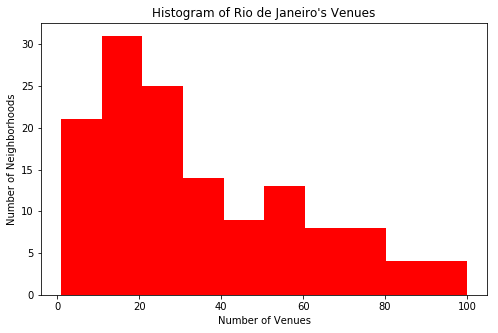

In [13]:
rio_counts['Counts'].plot(kind='hist', figsize=(8, 5), color = 'red')

plt.title('Histogram of Rio de Janeiro\'s Venues') # add a title to the histogram
plt.ylabel('Number of Neighborhoods') # add y-label
plt.xlabel('Number of Venues') # add x-label

plt.show()

In [59]:
rio_counts['Counts'].mode()

0    18
dtype: int64

In [61]:
 print('Mean number of venues:' + str(round(rio_counts['Counts'].mean())))

Mean number of venues:35


**Let's find out how many unique categories can be curated from all the returned venues**

In [14]:
print('There are {} uniques categories.'.format(len(rio_venues['Venue Category'].unique())))

There are 296 uniques categories.


## 3. Analyze Each Neighborhood

### 3.1 Analyze Each Neighborhood's Main Venue Category

In [15]:
# one hot encoding
rio_onehot_main = pd.get_dummies(rio_venues[['Main Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
rio_onehot_main[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']] = rio_venues[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']]

# move neighborhood column to the first column
fixed_columns_1 = rio_onehot_main.columns[[rio_onehot_main.columns.get_loc("Neighborhood"),rio_onehot_main.columns.get_loc('Neighborhood Latitude'),rio_onehot_main.columns.get_loc('Neighborhood Longitude')]].tolist() # última coluna do one_hotencoding + todas as colunas exceto a última!

fixed_columns_2 = rio_onehot_main.columns[:-4].tolist() # última coluna do one_hotencoding + todas as colunas exceto a última!

rio_onehot_main = rio_onehot_main[fixed_columns_1 + fixed_columns_2]

rio_onehot_main.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops
0,Leme 1,-22.962373,-43.168171,0,0,0,0,0,1,0,0
1,Leme 1,-22.962373,-43.168171,0,0,0,0,0,0,1,0
2,Leme 1,-22.962373,-43.168171,0,0,0,0,0,0,1,0
3,Leme 1,-22.962373,-43.168171,0,0,0,0,1,0,0,0
4,Leme 1,-22.962373,-43.168171,0,0,0,0,0,0,0,0


**Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each main category**

In [16]:
rio_grouped_mean_main = rio_onehot_main.groupby(['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']).mean().reset_index()
rio_grouped_mean_main

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops
0,Alto da Boa Vista I,-22.965528,-43.277408,0.000000,0.250000,0.0,0.0,0.000000,0.000000,0.750000,0.000000
1,Alto da Boa Vista II,-22.972562,-43.283824,0.333333,0.000000,0.0,0.0,0.333333,0.166667,0.000000,0.166667
2,Andaraí - Uberaba,-22.926316,-43.253679,0.000000,0.055556,0.0,0.0,0.444444,0.388889,0.000000,0.111111
3,Arpoador,-22.987654,-43.193437,0.000000,0.031250,0.0,0.0,0.250000,0.093750,0.281250,0.062500
4,Av. Franklin Roosevelt,-22.909291,-43.169493,0.032258,0.064516,0.0,0.0,0.580645,0.096774,0.032258,0.032258
5,Av. Marechal Floriano,-22.902342,-43.185637,0.000000,0.080000,0.0,0.0,0.580000,0.040000,0.000000,0.300000
6,Av. Salvador de Sá,-22.912628,-43.200780,0.107143,0.000000,0.0,0.0,0.821429,0.000000,0.000000,0.071429
7,Bairro de Fátima,-22.915672,-43.188266,0.000000,0.157895,0.0,0.0,0.263158,0.157895,0.105263,0.210526
8,Botafogo 1,-22.956530,-43.193978,0.057971,0.014493,0.0,0.0,0.550725,0.188406,0.000000,0.173913
9,Botafogo 2,-22.955815,-43.189830,0.090909,0.045455,0.0,0.0,0.454545,0.136364,0.000000,0.272727


In [17]:
rio_grouped_mean_main.to_excel('rio_grouped_mean_main.xlsx')

In [18]:
rio_grouped_num_main = rio_onehot_main.groupby(['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']).sum().reset_index()

rio_grouped_num_main.to_excel('rio_grouped_num_main.xlsx')

rio_grouped_num_main

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops
0,Alto da Boa Vista I,-22.965528,-43.277408,0,1,0,0,0,0,3,0
1,Alto da Boa Vista II,-22.972562,-43.283824,2,0,0,0,2,1,0,1
2,Andaraí - Uberaba,-22.926316,-43.253679,0,1,0,0,8,7,0,2
3,Arpoador,-22.987654,-43.193437,0,1,0,0,8,3,9,2
4,Av. Franklin Roosevelt,-22.909291,-43.169493,1,2,0,0,18,3,1,1
5,Av. Marechal Floriano,-22.902342,-43.185637,0,4,0,0,29,2,0,15
6,Av. Salvador de Sá,-22.912628,-43.200780,3,0,0,0,23,0,0,2
7,Bairro de Fátima,-22.915672,-43.188266,0,3,0,0,5,3,2,4
8,Botafogo 1,-22.956530,-43.193978,4,1,0,0,38,13,0,12
9,Botafogo 2,-22.955815,-43.189830,2,1,0,0,10,3,0,6


### Creating a HeatMap for each main category

**Arts and Entertainment**

In [565]:
map_rio_heat_main = folium.Map(location=[latitude, longitude], zoom_start=12.00)
map_rio_heat_main.add_child(HeatMap(data=rio_grouped_num_main[['Neighborhood Latitude','Neighborhood Longitude', 'arts_entertainment']].groupby(['Neighborhood Latitude','Neighborhood Longitude']).sum().reset_index().values.tolist(), radius=30, max_zoom=13, min_opacity = 0.4, max_val = 50,gradient={.7: 'green', .94: 'orange', 1: 'red'}))

**Building**

In [566]:
map_rio_heat_main = folium.Map(location=[latitude, longitude], zoom_start=12.00)
map_rio_heat_main.add_child(HeatMap(data=rio_grouped_num_main[['Neighborhood Latitude','Neighborhood Longitude', 'building']].groupby(['Neighborhood Latitude','Neighborhood Longitude']).sum().reset_index().values.tolist(), radius=30, max_zoom=13, min_opacity = 0.4, max_val = 50,gradient={.7: 'green', .94: 'orange', 1: 'red'}))

**Education**

In [24]:
map_rio_heat_main = folium.Map(location=[latitude, longitude], zoom_start=12.00)
map_rio_heat_main.add_child(HeatMap(data=rio_grouped_num_main[['Neighborhood Latitude','Neighborhood Longitude', 'education']].groupby(['Neighborhood Latitude','Neighborhood Longitude']).sum().reset_index().values.tolist(), radius=30, max_zoom=13, min_opacity = 0.5, max_val = 50,gradient={.7: 'green', .94: 'orange', 1: 'red'}))

**Event**

In [25]:
map_rio_heat_main = folium.Map(location=[latitude, longitude], zoom_start=12.00)
map_rio_heat_main.add_child(HeatMap(data=rio_grouped_num_main[['Neighborhood Latitude','Neighborhood Longitude', 'event']].groupby(['Neighborhood Latitude','Neighborhood Longitude']).sum().reset_index().values.tolist(), radius=30, max_zoom=13, min_opacity = 0.5, max_val = 50,gradient={.7: 'green', .94: 'orange', 1: 'red'}))

**Food**

In [26]:
map_rio_heat_main = folium.Map(location=[latitude, longitude], zoom_start=12.00)
map_rio_heat_main.add_child(HeatMap(data=rio_grouped_num_main[['Neighborhood Latitude','Neighborhood Longitude', 'food']].groupby(['Neighborhood Latitude','Neighborhood Longitude']).sum().reset_index().values.tolist(), radius=30, max_zoom=13, min_opacity = 0.3, max_val = 50,gradient={.7: 'green', .995: 'orange', 1: 'red'}))

**Nightlife**

In [27]:
map_rio_heat_main = folium.Map(location=[latitude, longitude], zoom_start=12.00)
map_rio_heat_main.add_child(HeatMap(data=rio_grouped_num_main[['Neighborhood Latitude','Neighborhood Longitude', 'nightlife']].groupby(['Neighborhood Latitude','Neighborhood Longitude']).sum().reset_index().values.tolist(), radius=30, max_zoom=13, min_opacity = 0.4, max_val = 50,gradient={.7: 'green', .94: 'orange', 1: 'red'}))

**Parks and Outdoors**

In [28]:
map_rio_heat_main = folium.Map(location=[latitude, longitude], zoom_start=12.00)
map_rio_heat_main.add_child(HeatMap(data=rio_grouped_num_main[['Neighborhood Latitude','Neighborhood Longitude', 'parks_outdoors']].groupby(['Neighborhood Latitude','Neighborhood Longitude']).sum().reset_index().values.tolist(), radius=30, max_zoom=13, min_opacity = 0.4, max_val = 50,gradient={.7: 'green', .94: 'orange', 1: 'red'}))

**Shops**

In [29]:
map_rio_heat_main = folium.Map(location=[latitude, longitude], zoom_start=12.00)
map_rio_heat_main.add_child(HeatMap(data=rio_grouped_num_main[['Neighborhood Latitude','Neighborhood Longitude', 'shops']].groupby(['Neighborhood Latitude','Neighborhood Longitude']).sum().reset_index().values.tolist(), radius=30, max_zoom=13, min_opacity = 0.3, max_val = 50,gradient={.7: 'green', .94: 'orange', 1: 'red'}))

### 3.2 Analyze Each Neighborhood's Venue Category

In [19]:
rio_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Main Venue Category,Venue Category
0,Leme 1,-22.962373,-43.168171,Bar do David,-22.960691,-43.168878,nightlife,Bar
1,Leme 1,-22.962373,-43.168171,Ponta do Leme,-22.962557,-43.166152,parks_outdoors,Beach
2,Leme 1,-22.962373,-43.168171,Calçadão do Leme,-22.962679,-43.167250,parks_outdoors,Pedestrian Plaza
3,Leme 1,-22.962373,-43.168171,Gaia Art & Café,-22.962270,-43.168331,food,Café
4,Leme 1,-22.962373,-43.168171,Windsor Leme Hotel,-22.963107,-43.169867,travel,Hotel


In [21]:
# one hot encoding
rio_onehot = pd.get_dummies(rio_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
rio_onehot[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']] = rio_venues[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']]

# move neighborhood column to the first column
fixed_columns_1 = rio_onehot.columns[[rio_onehot.columns.get_loc("Neighborhood"),rio_onehot.columns.get_loc('Neighborhood Latitude'),rio_onehot.columns.get_loc('Neighborhood Longitude')]].tolist() # última coluna do one_hotencoding + todas as colunas exceto a última!

fixed_columns_2 = rio_onehot.columns[:-4].tolist() # última coluna do one_hotencoding + todas as colunas exceto a última!

rio_onehot = rio_onehot[fixed_columns_1 + fixed_columns_2]

rio_onehot.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Acai House,Accessories Store,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Aquarium,...,Video Game Store,Video Store,Volleyball Court,Warehouse,Water Park,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Leme 1,-22.962373,-43.168171,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Leme 1,-22.962373,-43.168171,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Leme 1,-22.962373,-43.168171,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Leme 1,-22.962373,-43.168171,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Leme 1,-22.962373,-43.168171,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
rio_grouped_mean = rio_onehot.groupby(["Neighborhood","Neighborhood Latitude", "Neighborhood Longitude"]).mean().reset_index().drop(["Neighborhood Latitude", "Neighborhood Longitude"],axis = 1)

In [23]:
rio_grouped_sum = rio_onehot.groupby(["Neighborhood","Neighborhood Latitude", "Neighborhood Longitude"]).sum().reset_index()

In [24]:
hostels = rio_grouped_sum[["Neighborhood","Neighborhood Latitude", "Neighborhood Longitude",'Hostel']]

hostels_sort = hostels[['Neighborhood','Hostel']].sort_values(by = 'Hostel', ascending = False).head(10).reset_index().drop('index',axis=1)

print(hostels_sort.to_latex())

hostels_sort

\begin{tabular}{llr}
\toprule
{} &                        Neighborhood &  Hostel \\
\midrule
0 &                        Copacabana 8 &       7 \\
1 &                              Lapa 1 &       6 \\
2 &               Glória - Santa Teresa &       6 \\
3 &         Copacabana - Bairro Peixoto &       4 \\
4 &                          Botafogo 3 &       4 \\
5 &                          Botafogo 4 &       3 \\
6 &  Santa Teresa - Largo dos Guimarães &       3 \\
7 &                            Leblon 3 &       3 \\
8 &                          Botafogo 5 &       3 \\
9 &                        Copacabana 2 &       2 \\
\bottomrule
\end{tabular}



,Neighborhood,Hostel
0,Copacabana 8,7
1,Lapa 1,6
2,Glória - Santa Teresa,6
3,Copacabana - Bairro Peixoto,4
4,Botafogo 3,4
5,Botafogo 4,3
6,Santa Teresa - Largo dos Guimarães,3
7,Leblon 3,3
8,Botafogo 5,3
9,Copacabana 2,2


In [56]:
#print(hostels.to_latex(encoding='utf-8'))

In [82]:
map_rio_heat = folium.Map(location=[latitude, longitude], zoom_start=12.00)
map_rio_heat.add_child(HeatMap(data=hostels[['Neighborhood Latitude','Neighborhood Longitude', 'Hostel']].groupby(['Neighborhood Latitude','Neighborhood Longitude']).sum().reset_index().values.tolist(), radius=30, max_zoom=13, min_opacity = 0.5, max_val = 50,gradient={.8: 'green', .94: 'orange', 1: 'red'}))

In [25]:
rio_scenic_beaches  = rio_grouped_sum[["Neighborhood","Neighborhood Latitude", "Neighborhood Longitude","Scenic Lookout","Beach"]]

rio_scenic_beaches.loc[:,"Scenic + Beaches"]  = rio_scenic_beaches.loc[:,"Scenic Lookout"] + rio_scenic_beaches.loc[:,"Beach"]

rio_scenic_beaches = rio_scenic_beaches.drop(['Scenic Lookout','Beach'], axis = 1)

rio_scenic_beaches = rio_scenic_beaches.sort_values('Scenic + Beaches', ascending = False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [115]:
rio_scenic_beaches.head(15)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Scenic + Beaches
69,Leme 1,-22.962373,-43.168171,4
98,São Conrado I,-22.998904,-43.269676,2
3,Arpoador,-22.987654,-43.193437,2
57,Jardim Botânico 4,-22.960951,-43.208751,1
123,Urca 1,-22.953349,-43.167989,1
52,Ipanema 2,-22.984335,-43.204910,1
114,Tijuca - Muda I,-22.937103,-43.245686,1
51,Ipanema 1,-22.984576,-43.198638,1
16,Botafogo 9,-22.941497,-43.179427,1
127,Vidigal II,-22.995919,-43.242632,1


In [126]:
map_rio_heat = folium.Map(location=[latitude, longitude], zoom_start=12.00)
map_rio_heat.add_child(HeatMap(data=rio_scenic_beaches[['Neighborhood Latitude','Neighborhood Longitude', 'Scenic + Beaches']].groupby(['Neighborhood Latitude','Neighborhood Longitude']).sum().reset_index().values.tolist(), radius=50, max_zoom=13, min_opacity = 0.5, max_val = 50,gradient={.8: 'green', .94: 'orange', 1: 'red'}))

**Getting the Most Common Venues**

Creating a function:

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except: # when num of indicators is over, this is, for n > 3, then (except)
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = rio_grouped_mean['Neighborhood']

for ind in np.arange(rio_grouped_mean.shape[0]): #iterate over rows and use function eturn_most_common_venues
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rio_grouped_mean.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alto da Boa Vista I,Lake,Church,Mountain,Trail,Drugstore,Frozen Yogurt Shop,Food Stand,Dive Bar,Food Truck,Fountain
1,Alto da Boa Vista II,Soccer Field,Big Box Store,Nightclub,Bakery,Fast Food Restaurant,Women's Store,Food Truck,Fountain,French Restaurant,Fried Chicken Joint
2,Andaraí - Uberaba,Bar,Dive Bar,Bakery,Japanese Restaurant,Creperie,Health & Beauty Service,Pizza Place,Bagel Shop,Gym / Fitness Center,Pub
3,Arpoador,Hotel,Hostel,Brazilian Restaurant,Ice Cream Shop,Board Shop,Scenic Lookout,Shopping Plaza,Snack Place,Convenience Store,Beach Bar
4,Av. Franklin Roosevelt,Brazilian Restaurant,Restaurant,Hotel,Vegetarian / Vegan Restaurant,Juice Bar,Airport Service,Plaza,Beer Garden,Theater,Church
5,Av. Marechal Floriano,Brazilian Restaurant,Italian Restaurant,Middle Eastern Restaurant,Restaurant,Miscellaneous Shop,Gourmet Shop,Diner,Pastelaria,Belgian Restaurant,Bistro
6,Av. Salvador de Sá,Brazilian Restaurant,Coffee Shop,Restaurant,Bistro,Soccer Stadium,Shopping Plaza,Performing Arts Venue,Middle Eastern Restaurant,Chocolate Shop,Sandwich Place
7,Bairro de Fátima,Gym / Fitness Center,Bar,Juice Bar,Farmers Market,Health Food Store,Food & Drink Shop,Snack Place,Food Stand,Plaza,Hotel
8,Botafogo 1,Bar,Brazilian Restaurant,Café,Vegetarian / Vegan Restaurant,Restaurant,Nightclub,Farmers Market,Pie Shop,Deli / Bodega,Peruvian Restaurant
9,Botafogo 2,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Nightclub,Health Food Store,Snack Place,Bar,Bakery,Hot Dog Joint,Music School,Theater


## 4) Clustering

### 4.1) Data Preparation

Selecting only the Neighborhoods with more than 10 venues.

In [44]:
rio_grouped_prep = rio_grouped_mean[rio_counts['Counts'] >= 5]
rio_grouped_prep.shape

(132, 295)

In [54]:
print(rio_counts[rio_counts['Counts'] < 5].sort_values(by = 'Counts', ascending = False).head(5).reset_index().drop('index', axis = 1).to_latex())

\begin{tabular}{llrrr}
\toprule
{} &         Neighborhood &  Neighborhood Latitude &  Neighborhood Longitude &  Counts \\
\midrule
0 &  Alto da Boa Vista I &             -22.965528 &              -43.277408 &       4 \\
1 &           Catumbi II &             -22.916378 &              -43.196243 &       4 \\
2 &     Tijuca - Usina I &             -22.943596 &              -43.255090 &       4 \\
3 &               Urca 2 &             -22.944836 &              -43.162149 &       4 \\
4 &           Sambódromo &             -22.913160 &              -43.197164 &       1 \\
\bottomrule
\end{tabular}



In [41]:
print(rio_counts.sort_values(by = 'Counts', ascending = False).head(5).reset_index().drop('index', axis = 1).to_latex())
rio_counts.sort_values(by = 'Counts', ascending = False).head(5).reset_index().drop('index', axis = 1)

\begin{tabular}{llrrr}
\toprule
{} &  Neighborhood &  Neighborhood Latitude &  Neighborhood Longitude &  Counts \\
\midrule
0 &  Copacabana 2 &             -22.969604 &              -43.185210 &     100 \\
1 &     Ipanema 1 &             -22.984576 &              -43.198638 &      95 \\
2 &    Botafogo 5 &             -22.947694 &              -43.185878 &      93 \\
3 &      Leblon 4 &             -22.985782 &              -43.227286 &      91 \\
4 &     Ipanema 2 &             -22.984335 &              -43.204910 &      87 \\
\bottomrule
\end{tabular}



,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Counts
0,Copacabana 2,-22.969604,-43.185210,100
1,Ipanema 1,-22.984576,-43.198638,95
2,Botafogo 5,-22.947694,-43.185878,93
3,Leblon 4,-22.985782,-43.227286,91
4,Ipanema 2,-22.984335,-43.204910,87


### 4.2) Clustering Based on Venue (Secondary or Specific Category)

In [56]:
# set number of clusters
kclusters = 5

rio_grouped_clustering = rio_grouped_prep.drop(['Neighborhood'], axis = 1)

rio_grouped_clustering.head()

,Acai House,Accessories Store,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,...,Video Game Store,Video Store,Volleyball Court,Warehouse,Water Park,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store
1,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.03125,0.0,0.0,0.0,0.0
4,0.0,0.00,0.032258,0.064516,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
5,0.0,0.02,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [57]:
kclusters = 21
kmeans = []

for k in range(3,kclusters): 
# run k-means clustering
   locals()['kmeans_' + str(k)] = KMeans(init = "k-means++", n_clusters=k, random_state=0).fit(rio_grouped_clustering)
# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 

In [58]:
Xaxis = range(3,kclusters)
Yaxis = []

for i in range(3,kclusters):
    print("kmeans_"+str(i)+'.'+"inertia_:", eval(str(("kmeans_"+str(i)+'.'+"inertia_"))))
    Yaxis.append(eval(str(("kmeans_"+str(i)+'.'+"inertia_"))))

kmeans_3.inertia_: 6.8348409276865
kmeans_4.inertia_: 6.654956774109442
kmeans_5.inertia_: 6.3242755488799105
kmeans_6.inertia_: 6.1163276052018825
kmeans_7.inertia_: 5.992516627900697
kmeans_8.inertia_: 5.758288362052097
kmeans_9.inertia_: 5.552014402606094
kmeans_10.inertia_: 5.35252594342251
kmeans_11.inertia_: 5.2986251104537985
kmeans_12.inertia_: 5.034125073182006
kmeans_13.inertia_: 4.959239691281813
kmeans_14.inertia_: 4.852942272787884
kmeans_15.inertia_: 4.6599796254837855
kmeans_16.inertia_: 4.629657772048711
kmeans_17.inertia_: 4.454605596478025
kmeans_18.inertia_: 4.501356107708284
kmeans_19.inertia_: 4.272069562462136
kmeans_20.inertia_: 4.210725169703588


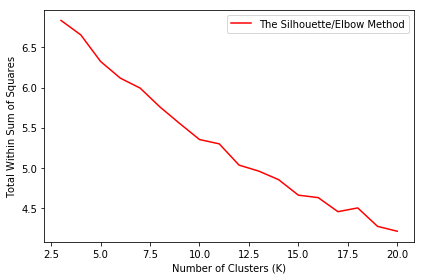

In [59]:
plt.plot(Xaxis, Yaxis, 'r')
plt.legend(('The Silhouette/Elbow Method', ''))
plt.ylabel('Total Within Sum of Squares')
plt.xlabel('Number of Clusters (K)')
plt.tight_layout()
plt.show()

Using the Silhouette-Elbow method, the appropriate number of clusters is **k = 15**.

### 4.3) Analyzing the Clusters (k=15)

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

First, obtaining the first 15 most comon venues

In [60]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except: # when num of indicators is over, this is, for n > 3, then (except)
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = rio_grouped_mean['Neighborhood']

for ind in np.arange(rio_grouped_mean.shape[0]): #iterate over rows and use function eturn_most_common_venues
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rio_grouped_mean.iloc[ind, :], num_top_venues)

Then, selecting only the neighborhoods with k > = 5.

In [63]:
rio_clusters = neighborhoods_venues_sorted[rio_counts['Counts'] >= 5]
rio_clusters.insert(0, "Cluster Label", kmeans_15.labels_)
rio_clusters.head()

,Cluster Label,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
1,10,Alto da Boa Vista II,Soccer Field,Big Box Store,Nightclub,Bakery,Fast Food Restaurant,Women's Store,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Food Court,Furniture / Home Store,Garden
2,3,Andaraí - Uberaba,Bar,Dive Bar,Bakery,Japanese Restaurant,Creperie,Health & Beauty Service,Pizza Place,Bagel Shop,Gym / Fitness Center,Pub,Restaurant,Department Store,Beer Bar,Frozen Yogurt Shop,Fried Chicken Joint
3,8,Arpoador,Hotel,Hostel,Brazilian Restaurant,Ice Cream Shop,Board Shop,Scenic Lookout,Shopping Plaza,Snack Place,Convenience Store,Beach Bar,Beach,Bathing Area,Bar,Mediterranean Restaurant,Salad Place
4,0,Av. Franklin Roosevelt,Brazilian Restaurant,Restaurant,Hotel,Vegetarian / Vegan Restaurant,Juice Bar,Airport Service,Plaza,Beer Garden,Theater,Church,Bar,Cooking School,Café,Tram Station,Coffee Shop
5,0,Av. Marechal Floriano,Brazilian Restaurant,Italian Restaurant,Middle Eastern Restaurant,Restaurant,Miscellaneous Shop,Gourmet Shop,Diner,Pastelaria,Belgian Restaurant,Bistro,Shoe Store,Gym / Fitness Center,Gym,Nightclub,Buffet


**Merging rio_cluster in order to obtain the Borough, the Latitude and the Longitude columns.**

In [64]:
rio_merged = rio_clusters.join(rio.set_index("Neighborhoods"), on = "Neighborhood")

Reorganizing the position of the columns:

In [65]:
rio_merged = rio_merged.iloc[:,[0,1,-3,-2,-1]].join(rio_merged.iloc[:,2:-3])
rio_merged

,Cluster Label,Neighborhood,Borough,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
1,10,Alto da Boa Vista II,Grande Tijuca,-22.972562,-43.283824,Soccer Field,Big Box Store,Nightclub,Bakery,Fast Food Restaurant,Women's Store,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Food Court,Furniture / Home Store,Garden
2,3,Andaraí - Uberaba,Grande Tijuca,-22.926316,-43.253679,Bar,Dive Bar,Bakery,Japanese Restaurant,Creperie,Health & Beauty Service,Pizza Place,Bagel Shop,Gym / Fitness Center,Pub,Restaurant,Department Store,Beer Bar,Frozen Yogurt Shop,Fried Chicken Joint
3,8,Arpoador,Zona Sul,-22.987654,-43.193437,Hotel,Hostel,Brazilian Restaurant,Ice Cream Shop,Board Shop,Scenic Lookout,Shopping Plaza,Snack Place,Convenience Store,Beach Bar,Beach,Bathing Area,Bar,Mediterranean Restaurant,Salad Place
4,0,Av. Franklin Roosevelt,Centro,-22.909291,-43.169493,Brazilian Restaurant,Restaurant,Hotel,Vegetarian / Vegan Restaurant,Juice Bar,Airport Service,Plaza,Beer Garden,Theater,Church,Bar,Cooking School,Café,Tram Station,Coffee Shop
5,0,Av. Marechal Floriano,Centro,-22.902342,-43.185637,Brazilian Restaurant,Italian Restaurant,Middle Eastern Restaurant,Restaurant,Miscellaneous Shop,Gourmet Shop,Diner,Pastelaria,Belgian Restaurant,Bistro,Shoe Store,Gym / Fitness Center,Gym,Nightclub,Buffet
6,0,Av. Salvador de Sá,Centro,-22.912628,-43.200780,Brazilian Restaurant,Coffee Shop,Restaurant,Bistro,Soccer Stadium,Shopping Plaza,Performing Arts Venue,Middle Eastern Restaurant,Chocolate Shop,Sandwich Place,Snack Place,Samba School,Vegetarian / Vegan Restaurant,Salad Place,Fried Chicken Joint
7,8,Bairro de Fátima,Centro,-22.915672,-43.188266,Gym / Fitness Center,Bar,Juice Bar,Farmers Market,Health Food Store,Food & Drink Shop,Snack Place,Food Stand,Plaza,Hotel,Mountain,Brazilian Restaurant,Martial Arts Dojo,Italian Restaurant,Fried Chicken Joint
8,0,Botafogo 1,Zona Sul,-22.956530,-43.193978,Bar,Brazilian Restaurant,Café,Vegetarian / Vegan Restaurant,Restaurant,Nightclub,Farmers Market,Pie Shop,Deli / Bodega,Peruvian Restaurant,Pizza Place,Chocolate Shop,Electronics Store,Gastropub,Steakhouse
9,0,Botafogo 2,Zona Sul,-22.955815,-43.189830,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Nightclub,Health Food Store,Snack Place,Bar,Bakery,Hot Dog Joint,Music School,Theater,Supermarket,Paper / Office Supplies Store,Salon / Barbershop,Art Gallery,Fruit & Vegetable Store
10,8,Botafogo 3,Zona Sul,-22.955519,-43.183618,Bar,Brazilian Restaurant,Pizza Place,Restaurant,Hostel,Dance Studio,Pet Store,Beer Bar,Bakery,Hotel,Coffee Shop,Pub,Wine Bar,Deli / Bodega,Salad Place


**Visualizing the resulting clusters**

In [66]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(rio_merged['Latitude'], rio_merged['Longitude'], rio_merged['Neighborhood'], rio_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##### Clusters by Number of Observations/Neighborhoods:

In [80]:
cluster_counts = rio_merged.groupby("Cluster Label").count().iloc[:,0:1].reset_index().rename(columns = {"Neighborhood" : "Counts"}).sort_values(by = 'Counts', ascending = False).reset_index().drop("index", axis = 1)
cluster_counts

,Cluster Label,Counts
0,8,41
1,0,36
2,3,19
3,5,16
4,2,4
5,13,4
6,4,3
7,14,2
8,1,1
9,6,1


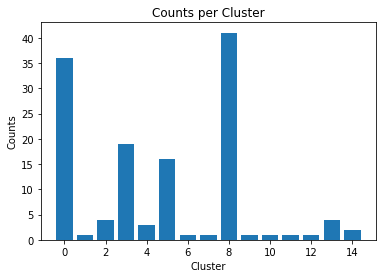

In [156]:
height = cluster_counts['Counts'].values
bars = cluster_counts['Cluster Label'].values
y_pos = np.arange(len(cluster_counts))
#bars =list(cluster_counts['Cluster Label'].apply(lambda x: str(x)))
plt.bar(bars,height)
plt.xlabel('Cluster')
plt.ylabel('Counts')
plt.title('Counts per Cluster')
#plt.xticks(y_pos,bars1)
plt.show()
#len(cluster_counts)

In [110]:
bars 

['8',
 '0',
 '3',
 '5',
 '2',
 '13',
 '4',
 '14',
 '1',
 '6',
 '7',
 '9',
 '10',
 '11',
 '12']

Graph of Cluster by Borough and Percentage of Borough cluster type

### 4.4) A Closer Look Into the Clusters:

part I analysis for the 15 clusters.

part II analysis of clusters by main venue type.

part III intra clusters number of options per hostel (entartainment/food/shops/ etc) and number of hostels (competition)

### Cluster 8:

In [168]:
rio_merged.loc[rio_merged['Cluster Label'] == 8, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
3,Arpoador,Zona Sul,Hotel,Hostel,Brazilian Restaurant,Ice Cream Shop,Board Shop,Scenic Lookout,Shopping Plaza,Snack Place,Convenience Store,Beach Bar,Beach,Bathing Area,Bar,Mediterranean Restaurant,Salad Place
7,Bairro de Fátima,Centro,Gym / Fitness Center,Bar,Juice Bar,Farmers Market,Health Food Store,Food & Drink Shop,Snack Place,Food Stand,Plaza,Hotel,Mountain,Brazilian Restaurant,Martial Arts Dojo,Italian Restaurant,Fried Chicken Joint
10,Botafogo 3,Zona Sul,Bar,Brazilian Restaurant,Pizza Place,Restaurant,Hostel,Dance Studio,Pet Store,Beer Bar,Bakery,Hotel,Coffee Shop,Pub,Wine Bar,Deli / Bodega,Salad Place
11,Botafogo 4,Zona Sul,Hotel,Bar,Burger Joint,Bookstore,Hostel,Deli / Bodega,Pharmacy,Café,Salad Place,Beer Bar,Brazilian Restaurant,Pizza Place,Middle Eastern Restaurant,Indie Movie Theater,Health & Beauty Service
12,Botafogo 5,Zona Sul,Brazilian Restaurant,Japanese Restaurant,Pizza Place,Bar,Coffee Shop,Hotel,Deli / Bodega,Burger Joint,Gym / Fitness Center,Restaurant,Hostel,Ice Cream Shop,Chocolate Shop,Middle Eastern Restaurant,Shoe Store
15,Botafogo 8,Zona Sul,Brazilian Restaurant,Ice Cream Shop,Chocolate Shop,Pizza Place,Clothing Store,Pastry Shop,Sporting Goods Shop,Shoe Store,Steakhouse,Food Truck,Cosmetics Shop,Juice Bar,Jewelry Store,Multiplex,Sports Club
16,Botafogo 9,Zona Sul,Japanese Restaurant,Hostel,Fruit & Vegetable Store,Gym,Church,Beach,Sushi Restaurant,BBQ Joint,Coffee Shop,Brazilian Restaurant,Gym / Fitness Center,Bar,Market,Pet Store,Dessert Shop
21,Catete 1,Zona Sul,Hotel,Snack Place,Coffee Shop,Brazilian Restaurant,Gym / Fitness Center,Museum,Café,Ice Cream Shop,Bar,Garden,Bus Station,Food Truck,Food Stand,Chocolate Shop,Paper / Office Supplies Store
28,Copacabana - Bairro Peixoto,Zona Sul,Hostel,Hotel,Bar,Plaza,Pie Shop,Snack Place,Gym / Fitness Center,Middle Eastern Restaurant,Shoe Store,Theater,Acai House,Brazilian Restaurant,Salon / Barbershop,Nightclub,Fountain
29,Copacabana 1,Zona Sul,Hotel,Bar,Italian Restaurant,Gym / Fitness Center,Coffee Shop,Beer Bar,Brazilian Restaurant,Ice Cream Shop,Gymnastics Gym,Pub,Spa,South American Restaurant,Soup Place,Churrascaria,Seafood Restaurant


In [158]:
from statistics import mode

In [169]:
cl8 = rio_merged.loc[rio_merged['Cluster Label'] == 8, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]].iloc[:,2:7].mode()
cl8.fillna("",inplace = True)
cl8.insert(loc = 0, column = 'Cluster', value = '8')
cl8 

,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,8,Bar,Bar,Bar,Bar,Coffee Shop
1,8,Brazilian Restaurant,,Pizza Place,Brazilian Restaurant,
2,8,Hotel,,,Gym / Fitness Center,
3,8,,,,Hotel,
4,8,,,,Pizza Place,
5,8,,,,Restaurant,


### Cluster 0:

In [170]:
rio_merged.loc[rio_merged['Cluster Label'] == 0, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
4,Av. Franklin Roosevelt,Centro,Brazilian Restaurant,Restaurant,Hotel,Vegetarian / Vegan Restaurant,Juice Bar,Airport Service,Plaza,Beer Garden,Theater,Church,Bar,Cooking School,Café,Tram Station,Coffee Shop
5,Av. Marechal Floriano,Centro,Brazilian Restaurant,Italian Restaurant,Middle Eastern Restaurant,Restaurant,Miscellaneous Shop,Gourmet Shop,Diner,Pastelaria,Belgian Restaurant,Bistro,Shoe Store,Gym / Fitness Center,Gym,Nightclub,Buffet
6,Av. Salvador de Sá,Centro,Brazilian Restaurant,Coffee Shop,Restaurant,Bistro,Soccer Stadium,Shopping Plaza,Performing Arts Venue,Middle Eastern Restaurant,Chocolate Shop,Sandwich Place,Snack Place,Samba School,Vegetarian / Vegan Restaurant,Salad Place,Fried Chicken Joint
8,Botafogo 1,Zona Sul,Bar,Brazilian Restaurant,Café,Vegetarian / Vegan Restaurant,Restaurant,Nightclub,Farmers Market,Pie Shop,Deli / Bodega,Peruvian Restaurant,Pizza Place,Chocolate Shop,Electronics Store,Gastropub,Steakhouse
9,Botafogo 2,Zona Sul,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Nightclub,Health Food Store,Snack Place,Bar,Bakery,Hot Dog Joint,Music School,Theater,Supermarket,Paper / Office Supplies Store,Salon / Barbershop,Art Gallery,Fruit & Vegetable Store
14,Botafogo 7,Zona Sul,Brazilian Restaurant,Hotel,Japanese Restaurant,Café,Snack Place,Pizza Place,Restaurant,Coffee Shop,Bar,Bookstore,Sushi Restaurant,Supermarket,Multiplex,Spa,Fried Chicken Joint
17,Camelôdromo,Centro,Brazilian Restaurant,Restaurant,Bar,Italian Restaurant,Art Gallery,Café,Bakery,Pastelaria,Sporting Goods Shop,Fabric Shop,Middle Eastern Restaurant,Bookstore,Gourmet Shop,Pharmacy,Pastry Shop
18,Candelária,Centro,Coffee Shop,Bookstore,Salad Place,Burger Joint,Brazilian Restaurant,Smoke Shop,Italian Restaurant,Dive Bar,Café,Restaurant,Church,Mediterranean Restaurant,Supermarket,Beer Garden,Bar
19,Carioca,Centro,Brazilian Restaurant,Theater,Chocolate Shop,Snack Place,Coffee Shop,Tram Station,Japanese Restaurant,Bookstore,Middle Eastern Restaurant,Café,Dance Studio,Shoe Store,Burger Joint,Chinese Restaurant,Clothing Store
20,Castelo,Centro,Brazilian Restaurant,Theater,Bar,Coffee Shop,Italian Restaurant,Tram Station,Buffet,Tea Room,Vegetarian / Vegan Restaurant,Juice Bar,Café,Pharmacy,Hotel,History Museum,Bus Station


In [172]:
cl0 = rio_merged.loc[rio_merged['Cluster Label'] == 0, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]].iloc[:,2:7].mode()
cl0.fillna("",inplace = True)
cl0.insert(loc = 0, column = 'Cluster', value = '0')
cl0 

,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Brazilian Restaurant,Restaurant,Bar,Vegetarian / Vegan Restaurant,Italian Restaurant
1,0,,Theater,,,Plaza
2,0,,,,,Restaurant


### Cluster 3:

In [173]:
rio_merged.loc[rio_merged['Cluster Label'] == 3, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
2,Andaraí - Uberaba,Grande Tijuca,Bar,Dive Bar,Bakery,Japanese Restaurant,Creperie,Health & Beauty Service,Pizza Place,Bagel Shop,Gym / Fitness Center,Pub,Restaurant,Department Store,Beer Bar,Frozen Yogurt Shop,Fried Chicken Joint
22,Catete 2,Zona Sul,Bar,Bakery,Restaurant,Dance Studio,Spa,French Restaurant,Music Venue,Paper / Office Supplies Store,Supermarket,Breakfast Spot,Brazilian Restaurant,Snack Place,Gym / Fitness Center,Pharmacy,Seafood Restaurant
40,Flamengo,Zona Sul,Bar,Brazilian Restaurant,Gym / Fitness Center,Supermarket,Ice Cream Shop,Restaurant,Pharmacy,Beer Bar,Japanese Restaurant,Café,Spa,Sports Bar,Music Venue,Gym Pool,Mexican Restaurant
46,Grajaú - Verdun,Grande Tijuca,Bar,Bakery,Karaoke Bar,Food Truck,Dessert Shop,Wine Bar,Health & Beauty Service,Beer Store,Chocolate Shop,Event Space,Fruit & Vegetable Store,Pizza Place,Gym / Fitness Center,Pharmacy,Plaza
54,Jardim Botânico 1,Zona Sul,Soccer Field,Garden,Bar,Brazilian Restaurant,Bakery,Café,Japanese Restaurant,Dive Spot,Pub,Boutique,Park,Playground,Bistro,Fountain,Food Truck
59,Lapa 1,Centro,Bar,Hostel,Nightclub,Brazilian Restaurant,Music Venue,Hotel,Dive Bar,Japanese Restaurant,Gym / Fitness Center,Pizza Place,Burger Joint,Pub,Historic Site,Dance Studio,Museum
72,Maracanã - General Canabarro,Grande Tijuca,Bar,Brazilian Restaurant,Dive Bar,BBQ Joint,Café,Gym,Music Venue,Food Court,Snack Place,Mineiro Restaurant,Hostel,Fast Food Restaurant,Bakery,Convenience Store,Bus Station
73,Maracanã - Senador Furtado,Grande Tijuca,Bar,Fast Food Restaurant,Brazilian Restaurant,Bakery,Sandwich Place,Women's Store,Music Venue,Snack Place,Food Court,Gym Pool,Convenience Store,Athletics & Sports,BBQ Joint,Burger Joint,Liquor Store
82,Praça da Bandeira I,Grande Tijuca,Bar,Brazilian Restaurant,Bakery,Hotel,Beer Bar,Basketball Stadium,Convenience Store,Food,Pizza Place,Athletics & Sports,Supermarket,Plaza,Pet Store,Cocktail Bar,Pub
83,Praça da Bandeira II,Grande Tijuca,Bar,Brazilian Restaurant,Athletics & Sports,Women's Store,Bakery,Sports Bar,Other Nightlife,Strip Club,Supermarket,Fried Chicken Joint,Beer Bar,Cocktail Bar,Food,Fast Food Restaurant,Train Station


In [174]:
cl3 = rio_merged.loc[rio_merged['Cluster Label'] == 3, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]].iloc[:,2:7].mode()
cl3.fillna("",inplace = True)
cl3.insert(loc = 0, column = 'Cluster', value = '3')
cl3 

,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,3,Bar,Brazilian Restaurant,Bakery,Japanese Restaurant,Bakery


### Cluster 05:

In [175]:
rio_merged.loc[rio_merged['Cluster Label'] == 5, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
44,Grajaú - Praça Edmundo Rêgo,Grande Tijuca,Bar,Gym,Music Venue,Bakery,Nature Preserve,Breakfast Spot,Brazilian Restaurant,Sushi Restaurant,Gym / Fitness Center,Tennis Court,Theater,Snack Place,Sports Club,Pet Store,Bus Station
49,Humaitá 1,Zona Sul,Bakery,Gym / Fitness Center,Brazilian Restaurant,Sandwich Place,Pizza Place,Vegetarian / Vegan Restaurant,Bar,Hostel,Playground,Gym,Theater,Italian Restaurant,Fried Chicken Joint,Food,Frozen Yogurt Shop
58,Lagoa - Fonte da Saudade,Zona Sul,Office,Music Venue,Food,Food Truck,Playground,Plaza,Bakery,Fast Food Restaurant,Gym / Fitness Center,Convenience Store,Martial Arts Dojo,Furniture / Home Store,Japanese Restaurant,Theater,Frozen Yogurt Shop
61,Laranjeiras 1,Zona Sul,Deli / Bodega,Cosmetics Shop,Arts & Crafts Store,Food Truck,Pharmacy,Pilates Studio,Bar,Pastelaria,Bakery,Gym,Plaza,Tennis Court,Beer Garden,Farmers Market,Brazilian Restaurant
100,Tijuca - Afonso Pena,Grande Tijuca,Gym,Bar,Pizza Place,Gym / Fitness Center,Pastelaria,Burger Joint,Chinese Restaurant,Plaza,Snack Place,Brazilian Restaurant,Dance Studio,Café,Furniture / Home Store,Fruit & Vegetable Store,Food Stand
101,Tijuca - Andrade Neves,Grande Tijuca,Pharmacy,Brazilian Restaurant,Pizza Place,Café,Bakery,Juice Bar,Bar,Chocolate Shop,Bookstore,Plaza,Soccer Field,Gym,Vegetarian / Vegan Restaurant,Gym / Fitness Center,Dance Studio
102,Tijuca - Av. Maracanã I,Grande Tijuca,Gym,Grocery Store,Brazilian Restaurant,Bakery,Italian Restaurant,Food Truck,Pet Store,Tennis Court,Gym / Fitness Center,Gourmet Shop,Dance Studio,Liquor Store,Fruit & Vegetable Store,Food Court,Furniture / Home Store
109,Tijuca - Haddock Lobo,Grande Tijuca,Bar,Japanese Restaurant,Gym / Fitness Center,Gym,Plaza,Department Store,Spa,Bakery,Pharmacy,Brazilian Restaurant,Brewery,Fast Food Restaurant,Bistro,Street Food Gathering,Gym Pool
111,Tijuca - José Higino,Grande Tijuca,Plaza,Pharmacy,Pizza Place,Bakery,Soccer Field,Pet Store,Gym / Fitness Center,Bistro,Health & Beauty Service,Café,Supermarket,Deli / Bodega,Restaurant,Fried Chicken Joint,French Restaurant
112,Tijuca - Maracanã II,Grande Tijuca,Bar,Bakery,Music Venue,Japanese Restaurant,Grocery Store,Pizza Place,Plaza,Department Store,Portuguese Restaurant,Gym / Fitness Center,Gym,Brazilian Restaurant,Farmers Market,Supermarket,Asian Restaurant


In [176]:
cl5 = rio_merged.loc[rio_merged['Cluster Label'] == 5, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]].iloc[:,2:7].mode()
cl5.fillna("",inplace = True)
cl5.insert(loc = 0, column = 'Cluster', value = '5')
cl5

,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,5,Bakery,Bar,Pizza Place,Bakery,Bakery
1,5,Bar,,,Japanese Restaurant,Pizza Place
2,5,Gym,,,,


### Cluster 04:

In [177]:
rio_merged.loc[rio_merged['Cluster Label'] == 4, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
23,Catumbi I,Centro,Brazilian Restaurant,Restaurant,Public Art,Food Truck,Coffee Shop,Plaza,Fried Chicken Joint,Food Court,Food Stand,Fountain,French Restaurant,Women's Store,Frozen Yogurt Shop,Food,Fruit & Vegetable Store
39,Estácio II,Centro,Brazilian Restaurant,Restaurant,Bank,Farmers Market,Fabric Shop,Women's Store,Fruit & Vegetable Store,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Food Court,Garden
89,Rua General Caldwell,Centro,Brazilian Restaurant,Bar,Library,Restaurant,Coffee Shop,Furniture / Home Store,Fried Chicken Joint,Food Stand,Food Truck,Fountain,French Restaurant,Fruit & Vegetable Store,Frozen Yogurt Shop,Food & Drink Shop,Garden


In [178]:
cl4 = rio_merged.loc[rio_merged['Cluster Label'] == 4, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]].iloc[:,2:7].mode()
cl4.fillna("",inplace = True)
cl4.insert(loc = 0, column = 'Cluster', value = '4')
cl4 

,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,4,Brazilian Restaurant,Restaurant,Bank,Farmers Market,Coffee Shop
1,4,,,Library,Food Truck,
2,4,,,Public Art,Restaurant,


### Cluster 02:

In [179]:
rio_merged.loc[rio_merged['Cluster Label'] == 2, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
13,Botafogo 6,Zona Sul,Food Truck,Bakery,Museum,Pet Store,Motel,Coffee Shop,Food Stand,Food Court,Café,History Museum,Music Venue,Brazilian Restaurant,Plaza,Recreation Center,Samba School
62,Laranjeiras 2,Zona Sul,Coffee Shop,Convenience Store,Sporting Goods Shop,Playground,Bakery,Flea Market,Paper / Office Supplies Store,Nightclub,Sports Club,Sports Bar,Lounge,Fruit & Vegetable Store,Museum,Plaza,Women's Store
71,Maracanã - Eurico Rabelo,Grande Tijuca,Soccer Stadium,Stadium,Pizza Place,Theme Park,Gym,Track,Track Stadium,Coffee Shop,Bakery,Museum,Sandwich Place,Convenience Store,Brazilian Restaurant,Fruit & Vegetable Store,Water Park
114,Tijuca - Muda I,Grande Tijuca,Grocery Store,Dive Bar,Farmers Market,Café,Supermarket,Brazilian Restaurant,Music Venue,Bistro,Gym,Pet Store,Pizza Place,Bakery,Snack Place,Samba School,Scenic Lookout


In [180]:
cl2 = rio_merged.loc[rio_merged['Cluster Label'] == 2, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]].iloc[:,2:7].mode()
cl2.fillna("",inplace = True)
cl2.insert(loc = 0, column = 'Cluster', value = '2')
cl2 

,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,2,Coffee Shop,Bakery,Farmers Market,Café,Bakery
1,2,Food Truck,Convenience Store,Museum,Pet Store,Gym
2,2,Grocery Store,Dive Bar,Pizza Place,Playground,Motel
3,2,Soccer Stadium,Stadium,Sporting Goods Shop,Theme Park,Supermarket


### Cluster 13:

In [52]:
rio_merged.loc[rio_merged['Cluster Label'] == 13, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
90,Rua Sacadura Cabral I,Centro,Nightclub,Music Venue,Brazilian Restaurant,Historic Site,Plaza,Restaurant,History Museum,Garden,Bookstore,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Frozen Yogurt Shop
91,Rua Sacadura Cabral II,Centro,Nightclub,Brazilian Restaurant,Music Venue,Historic Site,Dive Bar,Bar,Mountain,Bistro,Gym / Fitness Center,Acai House,Burger Joint,Garden,Champagne Bar,Film Studio,Plaza
125,Valongo,Centro,Nightclub,Music Venue,Bar,Brazilian Restaurant,Historic Site,Buffet,Seafood Restaurant,Garden,Burger Joint,Restaurant,Bookstore,Gym / Fitness Center,Dive Bar,Ice Cream Shop,Gay Bar
126,Vidigal I,Zona Sul,Nightclub,Restaurant,Empanada Restaurant,Mountain,Hostel,Seafood Restaurant,Grocery Store,Sushi Restaurant,Brazilian Restaurant,Garden,Gas Station,Food Court,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop


In [183]:
cl13 = rio_merged.loc[rio_merged['Cluster Label'] == 13, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]].iloc[:,2:7].mode()
cl13.fillna("",inplace = True)
cl13.insert(loc = 0, column = 'Cluster', value = '13')
cl13

,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,13,Nightclub,Music Venue,Bar,Historic Site,Dive Bar
1,13,,,Brazilian Restaurant,,Historic Site
2,13,,,Hostel,,Plaza
3,13,,,Music Venue,,Seafood Restaurant


### Cluster 06:

In [182]:
rio_merged.loc[rio_merged['Cluster Label'] == 6, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
43,Glória - Santa Teresa,Zona Sul,Hostel,Bar,Art Museum,Bistro,Historic Site,History Museum,Farmers Market,Plaza,Pool,Vegetarian / Vegan Restaurant,Restaurant,Amphitheater,Event Space,Food & Drink Shop,Gastropub


In [55]:
cl6 = rio_merged.loc[rio_merged['Cluster Label'] == 6, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]].iloc[:,2:7].mode()
cl6.fillna("",inplace = True)
cl6.insert(loc = 0, column = 'Cluster', value = '6')
cl6 

,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,6,Hostel,Bar,Art Museum,Acai House,Historic Site
1,6,,,Hotel,Bistro,Pie Shop


### Cluster 14:

In [56]:
rio_merged.loc[rio_merged['Cluster Label'] == 14, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
45,Grajaú - Praça Mauvino Reis,Grande Tijuca,Bar,Pizza Place,Gym,Restaurant,Brazilian Restaurant,Japanese Restaurant,Sports Bar,Bakery,Tennis Court,French Restaurant,Food Stand,Food Truck,Fountain,Frozen Yogurt Shop,Fried Chicken Joint
127,Vidigal II,Zona Sul,Bar,Hostel,Trail,Bakery,Scenic Lookout,French Restaurant,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,Women's Store,Food,Frozen Yogurt Shop,Fruit & Vegetable Store


In [57]:
cl14 = rio_merged.loc[rio_merged['Cluster Label'] == 14, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]].iloc[:,2:7].mode()
cl14.fillna("",inplace = True)
#cl14["Cluster"] = 'cluster 14'
cl14.insert(loc = 0, column = 'Cluster', value = '14')
cl14 

,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,14,Bar,Hostel,Gym,Bakery,Brazilian Restaurant
1,14,,Pizza Place,Trail,Restaurant,Scenic Lookout


### cluster 1:

In [58]:
rio_merged.loc[rio_merged['Cluster Label'] == 1, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
26,Cidade do Samba,Centro,Factory,Performing Arts Venue,Theater,Recreation Center,Samba School,Fast Food Restaurant,Tram Station,Public Art,Women's Store,Food Stand,Food Truck,Fountain,Fried Chicken Joint,French Restaurant,Food & Drink Shop


In [59]:
cl1 = rio_merged.loc[rio_merged['Cluster Label'] == 1, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]].iloc[:,2:7].mode()
cl1.fillna("",inplace = True)
cl1.insert(loc = 0, column = 'Cluster', value = '1')
cl1 

,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,Factory,Performing Arts Venue,Theater,Recreation Center,Samba School


### cluster 7:

In [60]:
rio_merged.loc[rio_merged['Cluster Label'] == 7, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
86,Rocinha II,Zona Sul,Sushi Restaurant,Burger Joint,Pizza Place,Snack Place,Gym / Fitness Center,Fast Food Restaurant,Women's Store,Fried Chicken Joint,Food Stand,Food Truck,Fountain,French Restaurant,Fruit & Vegetable Store,Frozen Yogurt Shop,Food & Drink Shop


In [61]:
cl7 = rio_merged.loc[rio_merged['Cluster Label'] == 7, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]].iloc[:,2:7].mode()
cl7.fillna("",inplace = True)
cl7.insert(loc = 0, column = 'Cluster', value = '7')
cl7 

,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,7,Sushi Restaurant,Burger Joint,Pizza Place,Snack Place,Gym / Fitness Center


### cluster 9:

In [62]:
rio_merged.loc[rio_merged['Cluster Label'] == 9, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
48,Gávea 2,Zona Sul,Brazilian Restaurant,Empada House,Amphitheater,Empanada Restaurant,Sushi Restaurant,Japanese Restaurant,College Quad,Bakery,Women's Store,Fruit & Vegetable Store,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gastropub


In [63]:
cl9 = rio_merged.loc[rio_merged['Cluster Label'] == 9, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]].iloc[:,2:7].mode()
cl9.fillna("",inplace = True)
cl9.insert(loc = 0, column = 'Cluster', value = '9')
cl9 

,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,9,Brazilian Restaurant,Empada House,Amphitheater,Empanada Restaurant,Sushi Restaurant


### cluster 10:

In [64]:
rio_merged.loc[rio_merged['Cluster Label'] == 10, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
1,Alto da Boa Vista II,Grande Tijuca,Soccer Field,Big Box Store,Bakery,Nightclub,Fast Food Restaurant,Women's Store,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Food Court,Furniture / Home Store,Garden


In [65]:
cl10 = rio_merged.loc[rio_merged['Cluster Label'] == 10, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]].iloc[:,2:7].mode()
cl10.fillna("",inplace = True)
cl10.insert(loc = 0, column = 'Cluster', value = '10')
cl10 

,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,10,Soccer Field,Big Box Store,Bakery,Nightclub,Fast Food Restaurant


### cluster 11:

In [66]:
rio_merged.loc[rio_merged['Cluster Label'] == 11, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
122,Tijuca - Usina II,Grande Tijuca,Outdoors & Recreation,Bakery,Nightclub,Gym,Social Club,Women's Store,Frozen Yogurt Shop,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Fruit & Vegetable Store,Garden


In [67]:
cl11 = rio_merged.loc[rio_merged['Cluster Label'] == 11, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]].iloc[:,2:7].mode()
cl11.fillna("",inplace = True)
cl11.insert(loc = 0, column = 'Cluster', value = '11')
cl11 

,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,11,Outdoors & Recreation,Bakery,Nightclub,Gym,Social Club


### cluster 12

In [68]:
rio_merged.loc[rio_merged['Cluster Label'] == 12, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
110,Tijuca - Heitor Beltrão,Grande Tijuca,Café,Tea Room,Dance Studio,Plaza,Martial Arts Dojo,Pet Store,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Women's Store,Frozen Yogurt Shop,Food & Drink Shop,Fruit & Vegetable Store


In [69]:
cl12 = rio_merged.loc[rio_merged['Cluster Label'] == 12, rio_merged.columns[[1,2] + list(range(5, rio_merged.shape[1]))]].iloc[:,2:7].mode()
cl12.fillna("",inplace = True)
cl12.insert(loc = 0, column = 'Cluster', value = '12')
cl12 

,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,12,Café,Tea Room,Dance Studio,Plaza,Martial Arts Dojo


### Merging the clusters by the five most common venues:

In [70]:
clusters_most_common = pd.DataFrame(cl8)
clusters_most_common = clusters_most_common.append([cl0, cl3, cl5, cl4, cl2, cl13, cl6, cl14, cl1, cl7, cl9, cl10, cl11, cl12])
#clusters_most_common = clusters_most_common.append([cl1, cl7, cl9, cl10, cl11, cl12])
clusters_most_common = clusters_most_common.groupby(['Cluster']).agg(lambda x: ", ".join(x.astype(str))).reset_index()

# Using Regex in order to remove the last commas.

clusters_most_common = clusters_most_common.replace( '(\.*?)(, )*?$',' ', regex=True )

# (\.*?) – Match zero or more (*) of any character except newline (.) as few times as possible (?)
# (, )? - Match zero or one (?) , at the end ($).
# (, )*? - Match zero or more (*) commas (, ) , at the end ($).

#clusters_most_common.to_excel("clusters_most_common.xlsx")

clusters_most_common

,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Brazilian Restaurant,Theater,Bar,Bar,"Coffee Shop, Plaza, Restaurant"
1,1,Factory,Performing Arts Venue,Theater,Recreation Center,Samba School
2,10,Soccer Field,Big Box Store,Bakery,Nightclub,Fast Food Restaurant
3,11,Outdoors & Recreation,Bakery,Nightclub,Gym,Social Club
4,12,Café,Tea Room,Dance Studio,Plaza,Martial Arts Dojo
5,13,Nightclub,Music Venue,"Bar, Brazilian Restaurant, Empanada Restaurant...",Historic Site,"Dive Bar, Historic Site, Hostel, Plaza"
6,14,Bar,"Hostel, Pizza Place","Gym, Trail","Bakery, Restaurant","Brazilian Restaurant, Scenic Lookout"
7,2,"Bakery, Convenience Store, Grocery Store, Socc...","Coffee Shop, Food Truck, Snack Place, Stadium","Flea Market, Pizza Place, Plaza, Scenic Lookout","Bistro, Museum, Pet Store, Theme Park",Gym
8,3,Bar,"Bakery, Brazilian Restaurant","Bakery, Brazilian Restaurant, Dive Bar, Restau...","Hotel, Japanese Restaurant",Bakery
9,4,Brazilian Restaurant,Restaurant,"Bank, Food Truck, Library","Coffee Shop, Farmers Market, Restaurant","Coffee Shop, Fabric Shop, Public Art"


### Adding a description based on the values found.

In [71]:
d0 = 'Restaurants, Bars and Culture'
d1 = 'Area Under Revitalization'
d10 = 'Soccer Field'
d11 = 'Outdoors & Recreation'
d12 = 'Café and Tea'
d13 = 'Nighclubs, Music and Historic Sites'
d14 = 'Bars, Hostels and Restaurants'
d2 = 'Good Variety of Options'
d3 = 'Bars, Bakeries and Restaurants'
d4 = 'Restaurants and Food Truck'
d5 = 'Fitness and Gyms'
d6 = 'Hostels, Bars and Culture'
d7 = 'Sushi and Burger'
d8 = 'Bars, Restaurants, Pizza and Coffe'
d9 = 'Brazilian Restaurants and Snack Bars'

#clusters_most_common['Cluster Description'] = ['Brazilian Restaurants, Bars and Theaters', 'Nighclubs and Music', 'Bars, Hostels and Restaurants','Good Variety of Options','Restaurants and Bars','Food and Public Art', 'Fitness and Gyms', 'Hostels, Bars and Culture', 'Brazilian Restaurants and Bars']
#clusters_most_common.insert(loc = 1, column = 'Cluster Description', value = ['Brazilian Restaurants, Bars, Theaters and Plazas', 'Nighclubs, Music and Historic Sites', 'Bars, Hostels and Restaurants','Good Variety of Options','Bars and Restaurants','Restaurants and Food Truck', 'Fitness and Gyms', 'Hostels, Bars and Culture', 'Brazilian Restaurants, Bars and Pizza'])

clusters_most_common.insert(loc = 1, column = 'Cluster Description', value = [d0,d1,d10,d11,d12,d13,d14,d2,d3,d4,d5,d6,d7,d8,d9])

clusters_most_common

,Cluster,Cluster Description,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,"Restaurants, Bars and Culture",Brazilian Restaurant,Theater,Bar,Bar,"Coffee Shop, Plaza, Restaurant"
1,1,Area Under Revitalization,Factory,Performing Arts Venue,Theater,Recreation Center,Samba School
2,10,Soccer Field,Soccer Field,Big Box Store,Bakery,Nightclub,Fast Food Restaurant
3,11,Outdoors & Recreation,Outdoors & Recreation,Bakery,Nightclub,Gym,Social Club
4,12,Café and Tea,Café,Tea Room,Dance Studio,Plaza,Martial Arts Dojo
5,13,"Nighclubs, Music and Historic Sites",Nightclub,Music Venue,"Bar, Brazilian Restaurant, Empanada Restaurant...",Historic Site,"Dive Bar, Historic Site, Hostel, Plaza"
6,14,"Bars, Hostels and Restaurants",Bar,"Hostel, Pizza Place","Gym, Trail","Bakery, Restaurant","Brazilian Restaurant, Scenic Lookout"
7,2,Good Variety of Options,"Bakery, Convenience Store, Grocery Store, Socc...","Coffee Shop, Food Truck, Snack Place, Stadium","Flea Market, Pizza Place, Plaza, Scenic Lookout","Bistro, Museum, Pet Store, Theme Park",Gym
8,3,"Bars, Bakeries and Restaurants",Bar,"Bakery, Brazilian Restaurant","Bakery, Brazilian Restaurant, Dive Bar, Restau...","Hotel, Japanese Restaurant",Bakery
9,4,Restaurants and Food Truck,Brazilian Restaurant,Restaurant,"Bank, Food Truck, Library","Coffee Shop, Farmers Market, Restaurant","Coffee Shop, Fabric Shop, Public Art"


In [73]:
rio_test = rio_merged[rio_merged["Cluster Label"].isin([0,13,14,2,3,4,5,6,8])].reset_index().drop('index', axis = 1).astype(str)
clusters_most_common = clusters_most_common.astype(str)
clusters_most_common['Cluster'] = clusters_most_common['Cluster'].str.strip()

In [74]:
rio_most_common = pd.merge(rio_test, clusters_most_common[['Cluster','Cluster Description']], left_on=['Cluster Label'], right_on =['Cluster'], how='inner')
rio_most_common_final = rio_most_common.iloc[:,[0,-1,1,2,3,4]].join(rio_most_common.iloc[:,5:-2])
rio_most_common_final

,Cluster Label,Cluster Description,Neighborhood,Borough,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,3,"Bars, Bakeries and Restaurants",Andaraí - Uberaba,Grande Tijuca,-22.9263161378468,-43.2536793261823,Bar,Bakery,Dive Bar,Japanese Restaurant,...,Gym / Fitness Center,Pub,Creperie,Health & Beauty Service,Restaurant,Department Store,Beer Bar,Pizza Place,Food Truck,Fountain
1,3,"Bars, Bakeries and Restaurants",Catete 2,Zona Sul,-22.924927,-43.179712,Bar,Bakery,Restaurant,Dance Studio,...,Paper / Office Supplies Store,French Restaurant,Music Venue,Supermarket,Breakfast Spot,Brazilian Restaurant,Snack Place,Gym / Fitness Center,Pharmacy,Seafood Restaurant
2,3,"Bars, Bakeries and Restaurants",Flamengo,Zona Sul,-22.934979,-43.178382,Bar,Brazilian Restaurant,Gym / Fitness Center,Ice Cream Shop,...,Restaurant,Japanese Restaurant,Pharmacy,Beer Bar,Café,Mexican Restaurant,Theater,Churrascaria,Tea Room,Shoe Store
3,3,"Bars, Bakeries and Restaurants",Grajaú - Verdun,Grande Tijuca,-22.923894790409,-43.258420451469,Bar,Bakery,Karaoke Bar,Gym / Fitness Center,...,Beer Store,Chocolate Shop,Pizza Place,Food Truck,Plaza,Pharmacy,Fruit & Vegetable Store,Event Space,Wine Bar,Dessert Shop
4,3,"Bars, Bakeries and Restaurants",Jardim Botânico 1,Zona Sul,-22.964517,-43.225191,Soccer Field,Bar,Garden,Brazilian Restaurant,...,Café,Japanese Restaurant,Park,Dive Spot,Pub,Boutique,Playground,Bistro,Fountain,Food Truck
5,3,"Bars, Bakeries and Restaurants",Lapa 1,Centro,-22.9138347744257,-43.1814432692381,Bar,Hostel,Nightclub,Hotel,...,Brazilian Restaurant,Japanese Restaurant,Dive Bar,Dance Studio,Pizza Place,Pub,Gym / Fitness Center,Burger Joint,Historic Site,Museum
6,3,"Bars, Bakeries and Restaurants",Maracanã - General Canabarro,Grande Tijuca,-22.9123261559038,-43.2239604011653,Bar,Brazilian Restaurant,Dive Bar,BBQ Joint,...,Gym,Music Venue,Snack Place,Food Court,Hostel,Mineiro Restaurant,Bakery,Convenience Store,Bus Station,Fast Food Restaurant
7,3,"Bars, Bakeries and Restaurants",Maracanã - Senador Furtado,Grande Tijuca,-22.9113213936482,-43.2191362441639,Bar,Fast Food Restaurant,Brazilian Restaurant,Sandwich Place,...,Women's Store,BBQ Joint,Bus Station,Burger Joint,Music Venue,Gym Pool,Snack Place,Food Court,Convenience Store,Other Nightlife
8,3,"Bars, Bakeries and Restaurants",Praça da Bandeira I,Grande Tijuca,-22.9139293193544,-43.2129990501204,Bar,Brazilian Restaurant,Bakery,Hotel,...,Clothing Store,Cocktail Bar,Beer Bar,Food,Fried Chicken Joint,Basketball Stadium,Convenience Store,Pizza Place,Pet Store,Supermarket
9,3,"Bars, Bakeries and Restaurants",Praça da Bandeira II,Grande Tijuca,-22.9116163745936,-43.215792489181,Bar,Brazilian Restaurant,Athletics & Sports,Women's Store,...,Supermarket,Strip Club,Burger Joint,Sports Bar,Pub,Pizza Place,Fast Food Restaurant,Food,Fried Chicken Joint,Other Nightlife


In [75]:
rio_most_common_final.to_excel("rio_most_common_final.xlsx")

In [139]:
#rio_grouped_num_main

# merging rio_grouped_num_main (with the main venue types) with hostels and rio_scenic_beaches
#hostels

rio_sum = pd.merge(rio_grouped_num_main, rio_counts[['Neighborhood','Counts']], on = 'Neighborhood')
rio_sum = pd.merge(rio_sum, hostels[['Neighborhood','Hostel']], on = 'Neighborhood')
rio_sum = pd.merge(rio_sum, rio_scenic_beaches[['Neighborhood','Scenic + Beaches']], on = 'Neighborhood')
rio_sum = pd.merge(rio_most_common_final.iloc[:,[0,1,2,3]], rio_sum, on = 'Neighborhood')

# sum of venues that can be relevant for tourismn
rio_sum = rio_sum.sort_values('Counts',ascending = False)
rio_sum['Counts Venues for Tourism'] = rio_sum.loc[:,['arts_entertainment','event','food','nightlife','parks_outdoors']].astype(int).sum(axis=1)
rio_sum['Counts Venues for Tourism/(Hostel + 1)'] = rio_sum['Counts Venues for Tourism'].div(rio_sum['Hostel'] + 1).round(2)

In [140]:
rio_sum

,Cluster Label,Cluster Description,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,Counts,Hostel,Scenic + Beaches,Counts Venues for Tourism,Counts Venues for Tourism/(Hostel + 1)
28,8,"Bars, Restaurants, Pizza and Coffe",Copacabana 2,Zona Sul,-22.969604,-43.185210,2,6,0,0,46,13,0,23,100,2,0,61,20.33
36,8,"Bars, Restaurants, Pizza and Coffe",Ipanema 1,Zona Sul,-22.984576,-43.198638,1,4,0,1,46,13,4,24,95,1,1,65,32.50
23,8,"Bars, Restaurants, Pizza and Coffe",Botafogo 5,Zona Sul,-22.947694,-43.185878,6,4,0,0,54,4,0,18,93,3,0,64,16.00
47,8,"Bars, Restaurants, Pizza and Coffe",Leblon 4,Zona Sul,-22.985782,-43.227286,1,2,0,0,52,13,5,12,91,0,1,71,71.00
37,8,"Bars, Restaurants, Pizza and Coffe",Ipanema 2,Zona Sul,-22.984335,-43.204910,2,5,0,0,41,8,3,21,87,1,1,54,27.00
49,8,"Bars, Restaurants, Pizza and Coffe",Leme 2,Zona Sul,-22.963840,-43.173703,1,3,0,0,46,10,5,14,85,0,0,62,62.00
34,8,"Bars, Restaurants, Pizza and Coffe",Gávea 1,Zona Sul,-22.975750,-43.228035,8,1,0,0,42,8,3,21,83,0,0,61,61.00
72,0,"Restaurants, Bars and Culture",Cinelândia,Centro,-22.910366,-43.175907,13,4,0,0,44,4,1,9,81,0,0,62,62.00
67,0,"Restaurants, Bars and Culture",Camelôdromo,Centro,-22.903379,-43.182878,6,2,0,0,43,5,2,22,80,0,0,56,56.00
85,0,"Restaurants, Bars and Culture",Praça Tiradentes,Centro,-22.906478,-43.182956,14,3,0,0,28,10,3,19,79,0,0,55,55.00


### Creating a ranking, using min-max normalization

In [159]:
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [168]:
np.array(rio_sum['Counts Venues for Tourism']) 
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [180]:
rio_rank = rio_sum.iloc[:,0:6]

In [181]:
rio_rank.loc[:,'Counts Venues for Tourism'] = (rio_sum.loc[:,'Counts Venues for Tourism'] - rio_sum.loc[:,'Counts Venues for Tourism'].min()) / (rio_sum.loc[:,'Counts Venues for Tourism'].max() - rio_sum.loc[:,'Counts Venues for Tourism'].min())
rio_rank.loc[:,'Counts Venues for Tourism/(Hostel + 1)'] = (rio_sum.loc[:,'Counts Venues for Tourism/(Hostel + 1)'] - rio_sum.loc[:,'Counts Venues for Tourism/(Hostel + 1)'].min()) / (rio_sum.loc[:,'Counts Venues for Tourism/(Hostel + 1)'].max() - rio_sum.loc[:,'Counts Venues for Tourism/(Hostel + 1)'].min())
rio_rank.loc[:,'Scenic + Beaches'] = (rio_sum.loc[:,'Scenic + Beaches'] - rio_sum.loc[:,'Scenic + Beaches'].min()) / (rio_sum.loc[:,'Scenic + Beaches'].max() - rio_sum.loc[:,'Scenic + Beaches'].min())

In [187]:
rio_rank_final = rio_rank.iloc[:,0:6]
rio_rank_final["Ranking"] = round(100*(6*rio_rank['Counts Venues for Tourism'] + 3*rio_rank['Counts Venues for Tourism/(Hostel + 1)'] + 1*rio_rank['Scenic + Beaches'])/10,2)

In [199]:
rio_rank_final_sorted = rio_rank_final.sort_values('Ranking', ascending = False).reset_index().drop('index', axis = 1)
rio_rank_final_sorted

,Cluster Label,Cluster Description,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Ranking
0,8,"Bars, Restaurants, Pizza and Coffe",Leblon 4,Zona Sul,-22.985782,-43.227286,92.50
1,0,"Restaurants, Bars and Culture",Praça Passeio Público,Centro,-22.912930,-43.177173,79.48
2,0,"Restaurants, Bars and Culture",Cinelândia,Centro,-22.910366,-43.175907,78.17
3,8,"Bars, Restaurants, Pizza and Coffe",Leme 2,Zona Sul,-22.963840,-43.173703,78.17
4,8,"Bars, Restaurants, Pizza and Coffe",Gávea 1,Zona Sul,-22.975750,-43.228035,76.86
5,8,"Bars, Restaurants, Pizza and Coffe",Ipanema 1,Zona Sul,-22.984576,-43.198638,70.57
6,0,"Restaurants, Bars and Culture",Camelôdromo,Centro,-22.903379,-43.182878,70.28
7,0,"Restaurants, Bars and Culture",Botafogo 1,Zona Sul,-22.956530,-43.193978,68.97
8,0,"Restaurants, Bars and Culture",Praça Tiradentes,Centro,-22.906478,-43.182956,68.97
9,8,"Bars, Restaurants, Pizza and Coffe",Lapa 2,Centro,-22.912367,-43.186272,67.65


In [203]:
rio_rank_final_20 = rio_rank_final_sorted.iloc[0:20,:].reset_index()
rio_rank_final_20['index'] = rio_rank_final_20['index'] + 1
rio_rank_final_20

,index,Cluster Label,Cluster Description,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Ranking
0,1,8,"Bars, Restaurants, Pizza and Coffe",Leblon 4,Zona Sul,-22.985782,-43.227286,92.50
1,2,0,"Restaurants, Bars and Culture",Praça Passeio Público,Centro,-22.912930,-43.177173,79.48
2,3,0,"Restaurants, Bars and Culture",Cinelândia,Centro,-22.910366,-43.175907,78.17
3,4,8,"Bars, Restaurants, Pizza and Coffe",Leme 2,Zona Sul,-22.963840,-43.173703,78.17
4,5,8,"Bars, Restaurants, Pizza and Coffe",Gávea 1,Zona Sul,-22.975750,-43.228035,76.86
5,6,8,"Bars, Restaurants, Pizza and Coffe",Ipanema 1,Zona Sul,-22.984576,-43.198638,70.57
6,7,0,"Restaurants, Bars and Culture",Camelôdromo,Centro,-22.903379,-43.182878,70.28
7,8,0,"Restaurants, Bars and Culture",Botafogo 1,Zona Sul,-22.956530,-43.193978,68.97
8,9,0,"Restaurants, Bars and Culture",Praça Tiradentes,Centro,-22.906478,-43.182956,68.97
9,10,8,"Bars, Restaurants, Pizza and Coffe",Lapa 2,Centro,-22.912367,-43.186272,67.65


In [208]:
# create map
map_ranking = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(rio_rank_final_20['Neighborhood Latitude'], rio_rank_final_20['Neighborhood Longitude'], rio_rank_final_20['Neighborhood'], rio_rank_final_20['index']):
    label = folium.Popup(str(poi) + ' Rank Position ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_ranking)
       
map_ranking